# Importing Libraries


In [ ]:
#Regular EDA(Exploratory Data Analysis) & Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

# Importing Data

In [ ]:
Mental = pd.read_csv("https://raw.githubusercontent.com/kuchbhi-kunal/nidan/main/survey%20(1).csv")
Mental

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


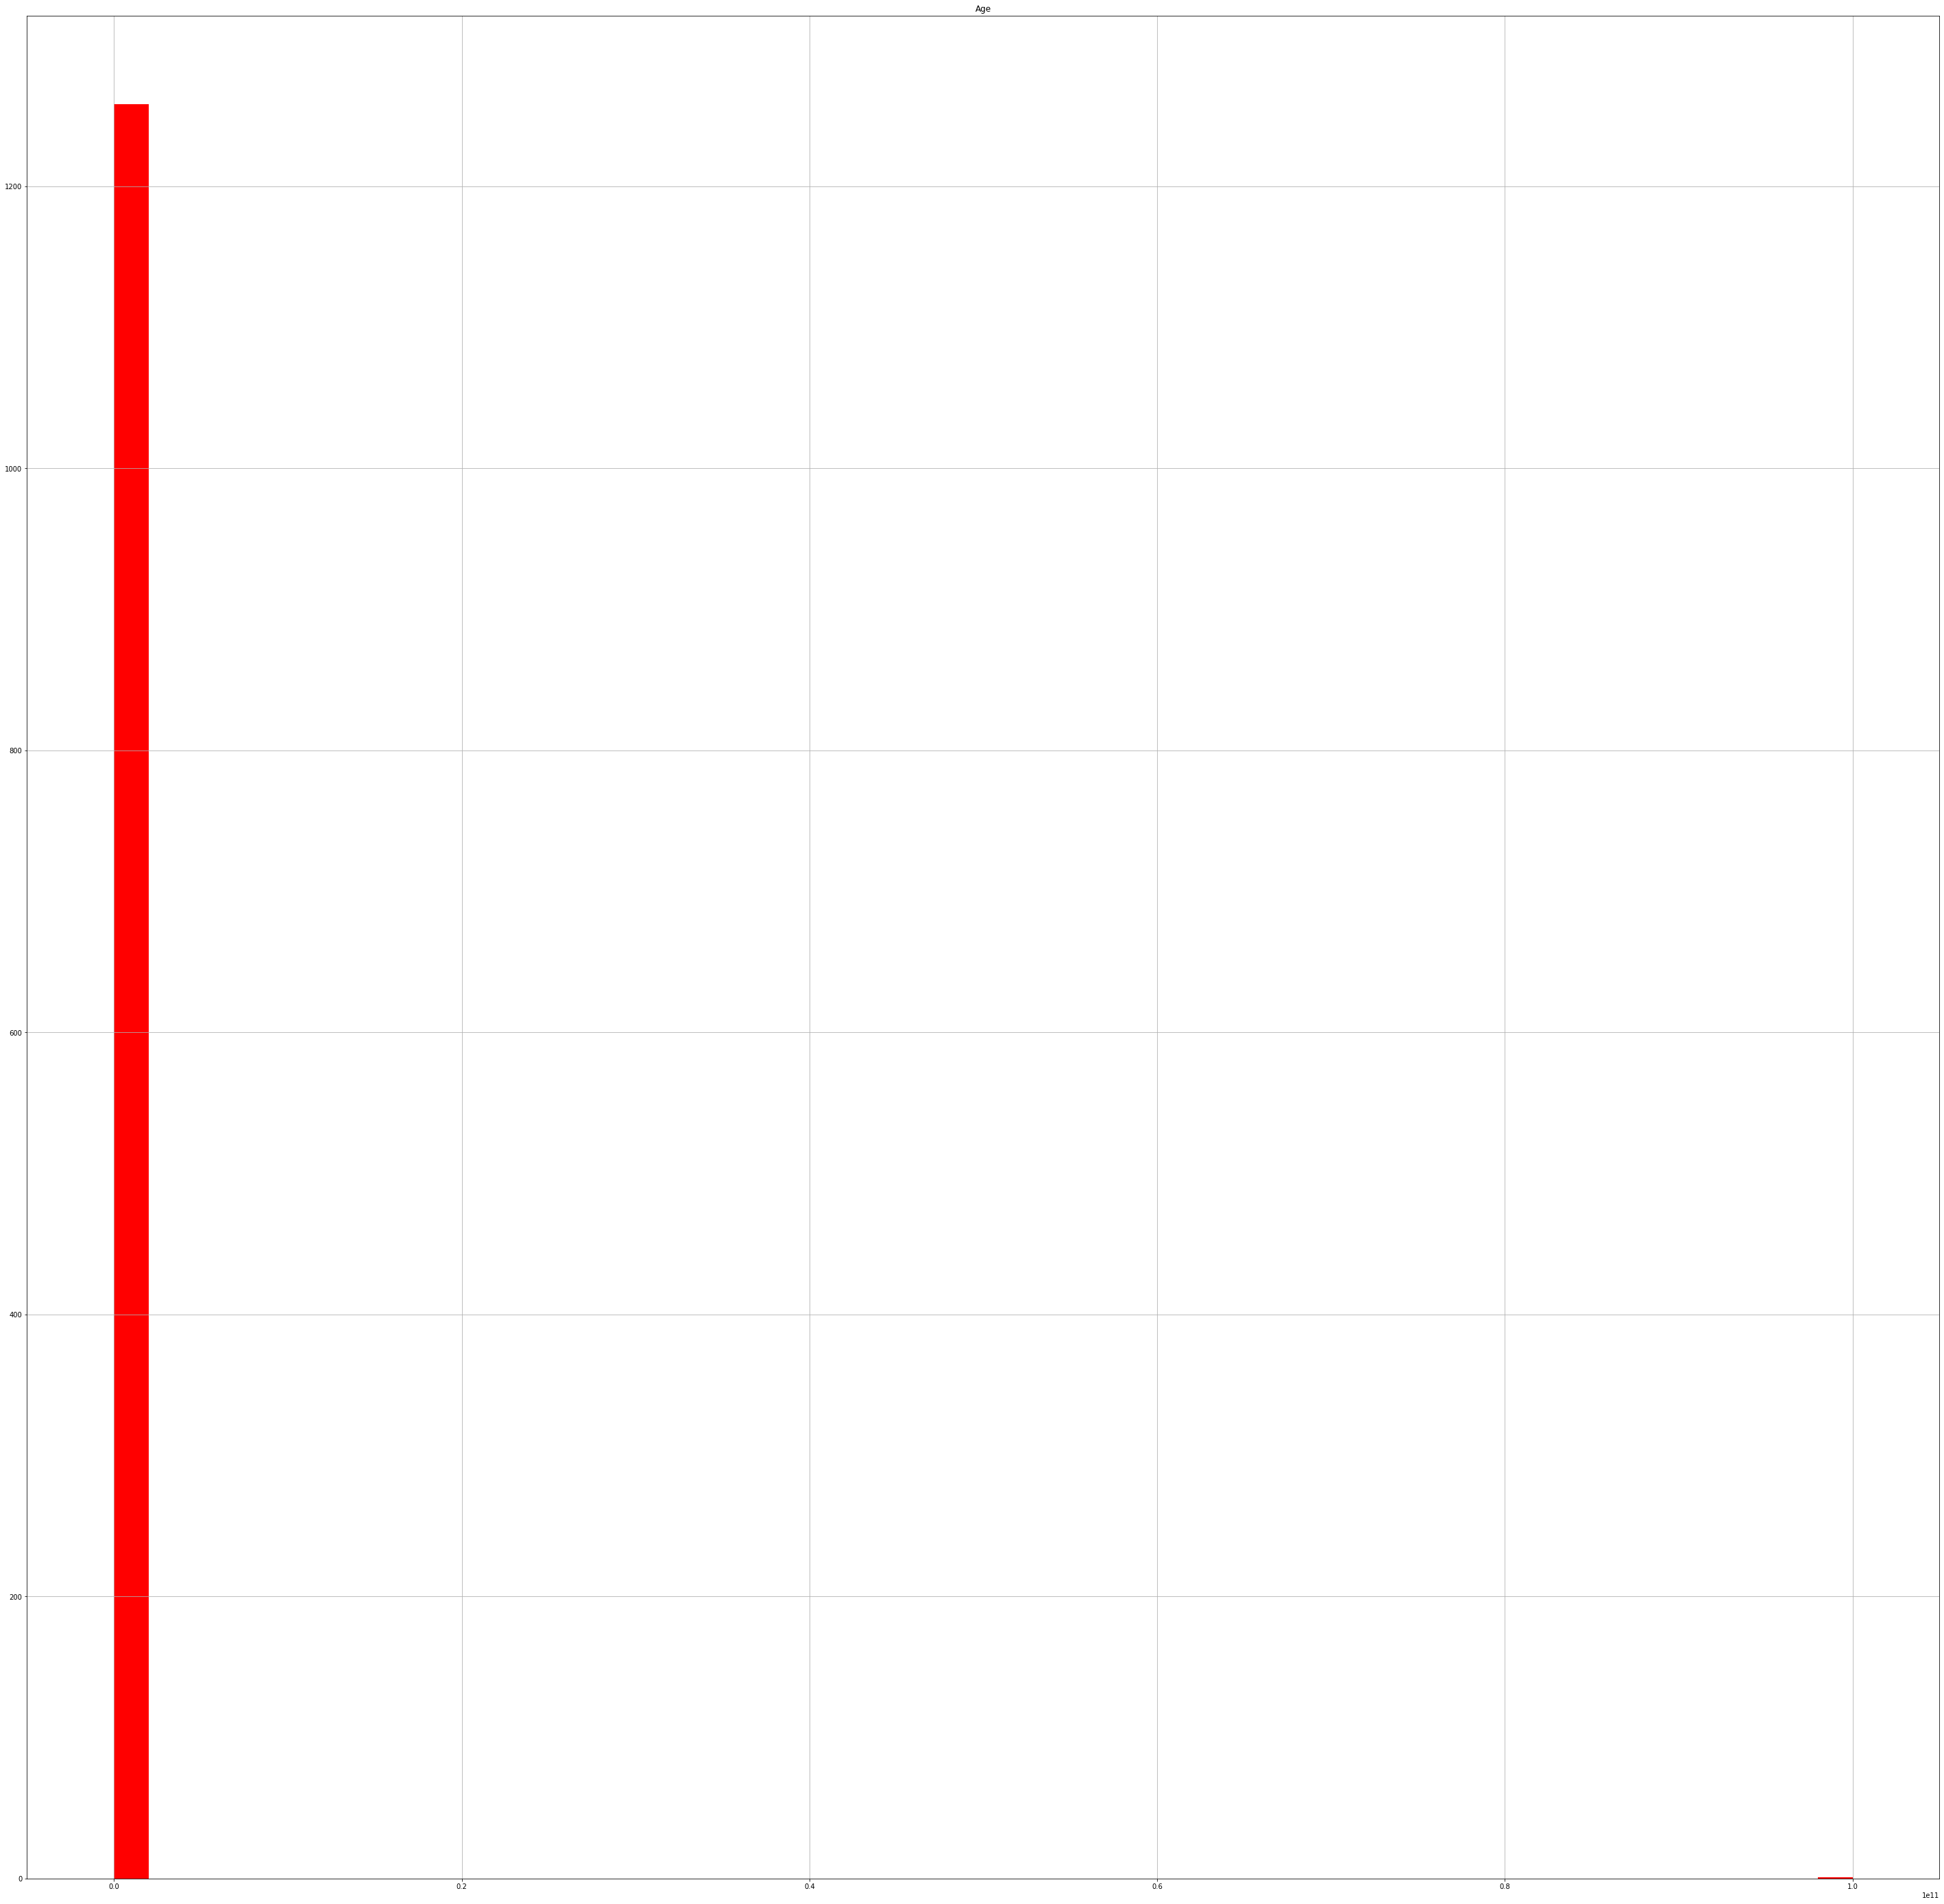

In [ ]:
Mental.hist(figsize=(50,50), bins=50, color="red");

In [ ]:
Mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
Mental.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

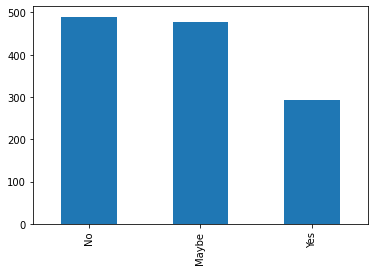

In [ ]:
Mental["mental_health_consequence"].value_counts().plot(kind='bar')

In [ ]:
Mental.head().T

,0,1,2,3,4
Timestamp,2014-08-27 11:29:31,2014-08-27 11:29:37,2014-08-27 11:29:44,2014-08-27 11:29:46,2014-08-27 11:30:22
Age,37,44,32,31,31
Gender,Female,M,Male,Male,Male
Country,United States,United States,Canada,United Kingdom,United States
state,IL,IN,NaN,NaN,TX
self_employed,NaN,NaN,NaN,NaN,NaN
family_history,No,No,No,Yes,No
treatment,Yes,No,No,Yes,No
work_interfere,Often,Rarely,Rarely,Often,Never
no_employees,6-25,More than 1000,6-25,26-100,100-500


In [ ]:
Mental.drop("comments",axis=1,inplace=True)

In [ ]:
Mental.head().T

,0,1,2,3,4
Timestamp,2014-08-27 11:29:31,2014-08-27 11:29:37,2014-08-27 11:29:44,2014-08-27 11:29:46,2014-08-27 11:30:22
Age,37,44,32,31,31
Gender,Female,M,Male,Male,Male
Country,United States,United States,Canada,United Kingdom,United States
state,IL,IN,NaN,NaN,TX
self_employed,NaN,NaN,NaN,NaN,NaN
family_history,No,No,No,Yes,No
treatment,Yes,No,No,Yes,No
work_interfere,Often,Rarely,Rarely,Often,Never
no_employees,6-25,More than 1000,6-25,26-100,100-500


In [ ]:
Mental.drop("Timestamp",axis=1,inplace=True)

In [ ]:
Mental.drop("state",axis=1,inplace=True)

In [ ]:
Mental["Country"].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [ ]:
print (Mental[Mental['Country'] == 'Slovenia'].index.tolist())

[129]


In [ ]:
Country=dict(Mental["Country"].value_counts())

In [ ]:
Countries = []
for x, y in Country.items():
  if(y<5):
    Countries.append(x)

In [ ]:
Countries

['Singapore',
 'Bulgaria',
 'Austria',
 'Finland',
 'Mexico',
 'Russia',
 'Denmark',
 'Greece',
 'Colombia',
 'Croatia',
 'Portugal',
 'Moldova',
 'Georgia',
 'Bahamas, The',
 'China',
 'Thailand',
 'Czech Republic',
 'Norway',
 'Romania',
 'Nigeria',
 'Japan',
 'Hungary',
 'Bosnia and Herzegovina',
 'Uruguay',
 'Spain',
 'Zimbabwe',
 'Latvia',
 'Costa Rica',
 'Slovenia',
 'Philippines']

In [ ]:
for i in range(0,len(Countries)):
  print (Mental[Mental['Country'] == f"{Countries[i]}"].index.tolist())

[584, 613, 1159, 1209]
[11, 209, 680, 1179]
[139, 204, 526]
[418, 478, 1247]
[97, 180, 869]
[93, 192, 670]
[819, 821]
[1069, 1229]
[277, 1168]
[729, 1110]
[37, 281]
[1140]
[1174]
[989]
[1178]
[753]
[1208]
[750]
[334]
[655]
[639]
[532]
[523]
[421]
[409]
[390]
[319]
[133]
[129]
[1213]


In [ ]:
Drop_list = [584, 613, 1159, 1209,11, 209, 680, 1179,139, 204, 526,418, 478, 1247,97, 180, 869,93, 192, 670,819, 821,1069, 1229,277, 1168,729, 1110,37, 281,1140,1174,989,1178,753,1208,750,334,655,639,532,523,421,409,390,319,133,129,1213]
Drop_list

[584,
 613,
 1159,
 1209,
 11,
 209,
 680,
 1179,
 139,
 204,
 526,
 418,
 478,
 1247,
 97,
 180,
 869,
 93,
 192,
 670,
 819,
 821,
 1069,
 1229,
 277,
 1168,
 729,
 1110,
 37,
 281,
 1140,
 1174,
 989,
 1178,
 753,
 1208,
 750,
 334,
 655,
 639,
 532,
 523,
 421,
 409,
 390,
 319,
 133,
 129,
 1213]

In [ ]:
Mental.drop(Drop_list,inplace=True)

In [ ]:
Mental["Country"].value_counts()

United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Switzerland         7
Poland              7
Italy               7
Sweden              7
Belgium             6
Brazil              6
South Africa        6
Israel              5
Name: Country, dtype: int64

In [ ]:
Mental.head().T

,0,1,2,3,4
Age,37,44,32,31,31
Gender,Female,M,Male,Male,Male
Country,United States,United States,Canada,United Kingdom,United States
self_employed,NaN,NaN,NaN,NaN,NaN
family_history,No,No,No,Yes,No
treatment,Yes,No,No,Yes,No
work_interfere,Often,Rarely,Rarely,Often,Never
no_employees,6-25,More than 1000,6-25,26-100,100-500
remote_work,No,No,No,No,Yes
tech_company,Yes,No,Yes,Yes,Yes


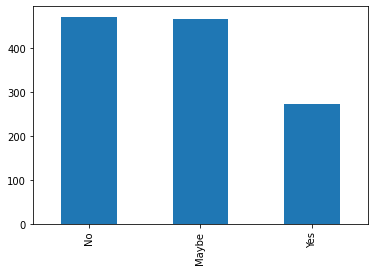

In [ ]:
Mental['mental_health_consequence'].value_counts().plot(kind='bar')

In [ ]:
Mental.isna().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 17
family_history                 0
treatment                      0
work_interfere               248
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

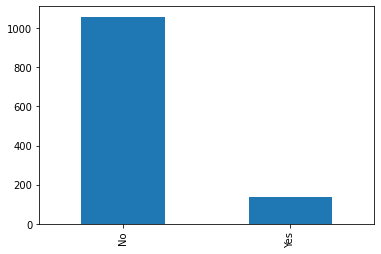

In [ ]:
Mental['self_employed'].value_counts().plot(kind='bar')

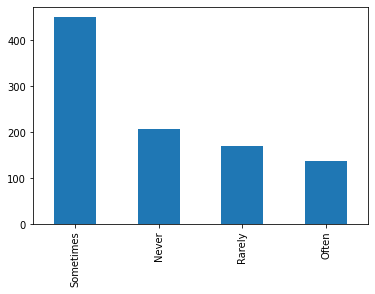

In [ ]:
Mental['work_interfere'].value_counts().plot(kind='bar')

In [ ]:
Mental.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [ ]:
Mental['self_employed'].fillna("No",inplace=True)

In [ ]:
Mental['work_interfere'].value_counts()

Sometimes    450
Never        206
Rarely       170
Often        136
Name: work_interfere, dtype: int64

In [ ]:
Mental['work_interfere'].fillna('Sometimes',inplace=True)

In [ ]:
Mental.isna().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [ ]:
X= Mental.drop('mental_health_consequence',axis=1)
Y=Mental['mental_health_consequence']

In [ ]:
X_train, X_test, Y_train1, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
Y_train1

453      Yes
692       No
194      Yes
935    Maybe
883       No
       ...  
65       Yes
932      Yes
301       No
468    Maybe
559    Maybe
Name: mental_health_consequence, Length: 968, dtype: object

In [ ]:
Columns = list(X_train.columns)

In [ ]:
Mental['family_history'].value_counts()

No     732
Yes    478
Name: family_history, dtype: int64

In [ ]:
Mental['treatment'].value_counts()

Yes    623
No     587
Name: treatment, dtype: int64

In [61]:
Mental['mental_health_interview'].value_counts()

No       976
Maybe    195
Yes       39
Name: mental_health_interview, dtype: int64

In [ ]:
Columns

['Age',
 'Gender',
 'Country',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [62]:
len(Columns)

22

In [66]:
for i in range(0,len(Columns)):
  print(Columns[i],":-")
  print(Mental[f"{Columns[i]}"].value_counts())
  print('\n')

Gender :-
Male                                              594
male                                              190
Female                                            121
M                                                 114
female                                             59
F                                                  38
m                                                  30
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Female                                              2
Man                                                 2
Female (trans)                                      2
Cis Male                                            2
Trans woman                                         1
msle                                                1
Neuter                                              1
cis male          

In [ ]:
Columns.remove('Age')

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['Age']),
    (OneHotEncoder(handle_unknown='ignore'),Columns)) 

In [ ]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(), ['Age']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Country', 'self_employed',
                                  'family_history', 'treatment',
                                  'work_interfere', 'no_employees',
                                  'remote_work', 'tech_company', 'benefits',
                                  'care_options', 'wellness_program',
                                  'seek_help', 'anonymity', 'leave',
                                  'phys_health_consequence', 'coworkers',
                                  'supervisor', 'mental_health_interview',
                                  'phys_health_interview', 'mental_vs_physical',
                                  'obs_consequence'])])

In [ ]:
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier(subsample= 0.8,
 scale_pos_weight= 5,
 reg_lambda= 1,
 max_depth= 5,
 learning_rate= 0.01,
 gamma= 1,
 colsample_bytree= 0.5)

xgb_cl.fit(X_train_ct,Y_train1)


XGBClassifier(colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=5,
              objective='multi:softprob', scale_pos_weight=5, subsample=0.8)

In [ ]:
t=np.array(Y_train1)

In [ ]:
len(t)

968

In [ ]:
Y_train=[]

for i in range(0,len(t)):
  if t[i]=='No':
    Y_train.append(0)
  elif t[i]=='Maybe':
    Y_train.append(1)
  else:
    Y_train.append(2)


In [ ]:
Y_train

[2,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [ ]:
np.unique(Y_train)

array([0, 1, 2])

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

# Init classifier
xgb_cl = xgb.XGBClassifier(subsample= 0.8,
 scale_pos_weight= 5,
 reg_lambda= 1,
 max_depth= 5,
 learning_rate= 0.01,
 gamma= 1,
 colsample_bytree= 0.5)

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="accuracy",verbose=2)

# Fit
grid_cv.fit(X_train_ct, Y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.5, gamma=1,
                                     learning_rate=0.01, max_depth=5,
                                     scale_pos_weight=5, subsample=0.8),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='accuracy', verbose=2)

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
xgb_cl = xgb.XGBClassifier(subsample= 0.8,
 scale_pos_weight= 1,
 reg_lambda= 1,
 max_depth= 3,
 learning_rate= 0.1,
 gamma= 1,
 colsample_bytree= 0.5)

In [ ]:
X_test_ct

<242x119 sparse matrix of type '<class 'numpy.float64'>'
	with 5560 stored elements in Compressed Sparse Row format>

In [ ]:
xgb_cl.fit(X_train_ct,Y_train1)
Y_preds = xgb_cl.predict(X_test_ct)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
Y_test1=[]

g=np.array(Y_test)

for i in range(0,len(g)):
  if g[i]=='No':
    Y_test1.append(0)
  elif g[i]=='Maybe':
    Y_test1.append(1)
  else:
    Y_test1.append(2)

In [ ]:
Y_test1

[1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 1]

In [ ]:
accuracy_score(Y_test1,Y_preds)

0.0

In [ ]:
xgb_cl1 = xgb.XGBClassifier()
xgb_cl1.fit(X_train_ct,Y_train)
Y_preds1 = xgb_cl1.predict(X_test_ct)

In [ ]:
accuracy_score(Y_test1,Y_preds1)

0.6776859504132231

In [59]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#Different HyperParameters
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,10,2),
          "min_samples_leaf":np.arange(1,10,2),
          "max_features":[0.5,1,"sqrt",'log2']}

#Instatantiate Randomised Search CV
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42),
                             param_distributions=rf_grid,
                             cv=5,
                             verbose=2,
                             n_iter=800,
                        return_train_score=True)
rs_model.fit(X_train_ct,Y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.7s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.6s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.6s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.6s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=20; total time=

KeyboardInterrupt: ignored

In [60]:
rs_model.best_params_

AttributeError: ignored

In [ ]:
RF = RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators= 90,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 10)

In [ ]:
RF.fit(X_train_ct,Y_train)

In [ ]:
Y_preds2 = RF.predict(X_test_ct)

In [ ]:
accuracy_score(Y_test1,Y_preds2)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#Different HyperParameters
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,10,2),
          "min_samples_leaf":np.arange(1,10,2),
          "max_features":[0.5,1,"sqrt",'log2']}

#Instatantiate Randomised Search CV
rs_model1 = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42),
                             param_distributions=rf_grid,
                             cv=5,
                             verbose=2,
                             n_iter=800,
                        return_train_score=True)
rs_model1.fit(X_train_ct,Y_train)

In [ ]:
rs_model1.best_params_

In [ ]:
RCL=RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators= 30,
 min_samples_split= 8,
 min_samples_leaf= 3,
 max_features= 'sqrt',
 max_depth= 10)

In [ ]:
RCL.fit(X_train_ct,Y_train)

In [ ]:
Y_preds3 = RCL.predict(X_test_ct)

In [ ]:
accuracy_score(Y_test1,Y_preds3)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=Y_test1, y_pred=Y_preds3))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=Y_test1, y_pred=Y_preds2))

RF Model will be used i.e. Prediction